      Temperatur  Windgeschwindigkeit  Bewoelkung  Wettercode  IsWeekend  \
0        17.8375                 15.0         6.0        20.0        0.0   
3638     17.8375                 15.0         6.0        20.0        0.0   
7223     17.8375                 15.0         6.0        20.0        0.0   
1819     17.8375                 15.0         6.0        20.0        0.0   
5457     17.8375                 15.0         6.0        20.0        0.0   

      IsPeakSeason  Temp_PeakSeason  Warengruppe_1  Warengruppe_2  \
0              0.0              0.0           True          False   
3638           0.0              0.0          False          False   
7223           0.0              0.0          False          False   
1819           0.0              0.0          False           True   
5457           0.0              0.0          False          False   

      Warengruppe_3  ...  Month_3  Month_4  Month_5  Month_6  Month_7  \
0             False  ...    False    False    False    

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 42125.9766 - mean_absolute_percentage_error: 72.6472 - val_loss: 3639.9797 - val_mean_absolute_percentage_error: 24.7508 - learning_rate: 0.0100
Epoch 2/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4357.7124 - mean_absolute_percentage_error: 25.6937 - val_loss: 3283.0696 - val_mean_absolute_percentage_error: 23.5378 - learning_rate: 0.0099
Epoch 3/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4599.3369 - mean_absolute_percentage_error: 23.1283 - val_loss: 3104.4634 - val_mean_absolute_percentage_error: 22.0961 - learning_rate: 0.0098
Epoch 4/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3748.3372 - mean_absolute_percentage_error: 22.0588 - val_loss: 3174.3596 - val_mean_absolute_percentage_error: 21.1569 - learning_rate: 0.0097
Epoch 5/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4239.5483 - mean_absolute_percentage_error: 22.0048 - val_loss: 3311.4761 - val_mean_absolute_percentage_error: 22.4001 - learning_rat

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3904.7007 - mean_absolute_percentage_error: 21.1207 - val_loss: 3340.4531 - val_mean_absolute_percentage_error: 22.2250 - learning_rate: 0.0092
Epoch 10/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3719.7593 - mean_absolute_percentage_error: 20.5301 - val_loss: 3255.3491 - val_mean_absolute_percentage_error: 21.8642 - learning_rate: 0.0091
Epoch 11/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3556.6655 - mean_absolute_percentage_error: 20.6286 - val_loss: 3240.8335 - val_mean_absolute_percentage_error: 21.9720 - learning_rate: 0.0090
Epoch 12/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3178.5339 - mean_absolute_percentage_error: 20.7235 - val_loss: 3423.6184 - val_mean_absolute_percentage_error: 22.8834 - learning_rate: 0.0090
Epoch 13/25
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3299.1313 - mean_absolute_percentage_error: 20.4477 - val_loss: 3399.6882 - val_mean_absolute_percentage_error: 22.5370 - learning_

/tmp/ipykernel_21653/4249497780.py:152: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mape_by_group = results_df.groupby('Warengruppe').apply(


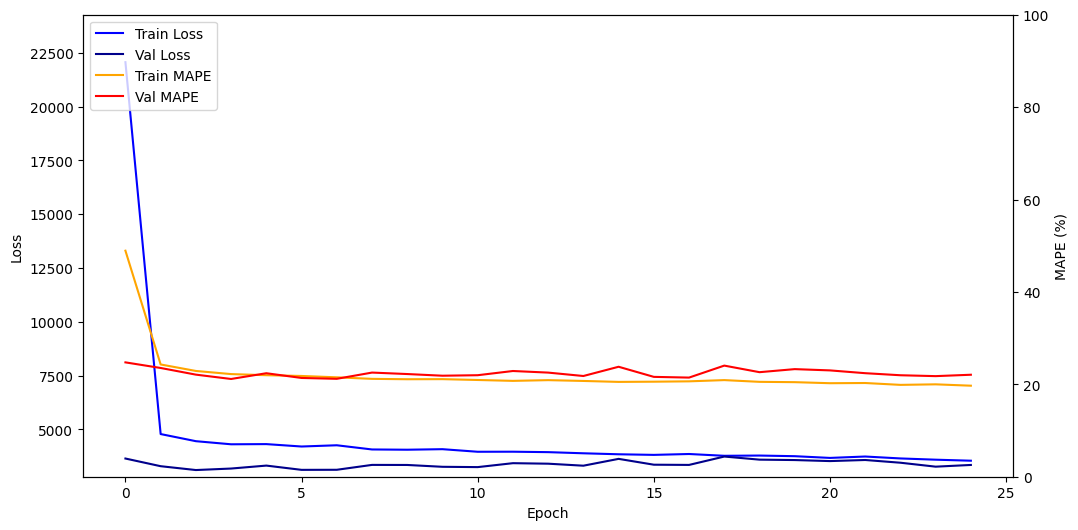

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
MAPE on validation set: 22.10%
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step


In [ ]:
'''

All v6.x is based on the 5.0 version

Changes:
- Only used basic monthly peak season detection for Warengruppe 6
- Single interaction term between temperature and peak season
- No rolling statistics or temporal features
- Simpler model architecture (single LSTM layer, fewer units)
- No special handling per Warengruppe category

--> doesnt lead to much improvemen

'''

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

# Load data
kiwo_url = '../../Data/kiwo.csv'
umsatz_url = '../../Data/train.csv'
wetter_url = '../../Data/wetter.csv'
test_url = '../../Data/test.csv'

df_kiwo = pd.read_csv(kiwo_url)
df_umsatz = pd.read_csv(umsatz_url)
df_wetter = pd.read_csv(wetter_url)
df_test = pd.read_csv(test_url)

# Merge data
df_train = pd.merge(df_umsatz, df_wetter, on='Datum', how='left')
df_train = pd.merge(df_train, df_kiwo, on='Datum', how='left')
df_test = pd.merge(df_test, df_wetter, on='Datum', how='left')
df_test = pd.merge(df_test, df_kiwo, on='Datum', how='left')


df_train_sorted = df_train.sort_values(by='Datum')

# Now use prepare_data
X_train = prepare_data(df_train_sorted, historical_data=df_train_sorted)
X_test = prepare_data(df_test, historical_data=df_train_sorted)

# Function to prepare data
def prepare_data(data, historical_data=None):
    data['Datum'] = pd.to_datetime(data['Datum'])
    data['DayOfWeek'] = data['Datum'].dt.dayofweek
    data['Month'] = data['Datum'].dt.month
    data['IsWeekend'] = (data['DayOfWeek'] >= 5).astype(float)
    data['KielerWoche'] = data['KielerWoche'].fillna(0).astype(float)
    
    # Create peak season flag for Warengruppe 6
    if historical_data is not None:
        peak_months = historical_data[historical_data['Warengruppe'] == 6]['Month'].value_counts()
        peak_months = peak_months[peak_months > peak_months.mean()].index
        data['IsPeakSeason'] = (data['Month'].isin(peak_months)).astype(float)
    else:
        data['IsPeakSeason'] = 0
    
    # Create interaction terms
    data['Temp_PeakSeason'] = data['Temperatur'] * data['IsPeakSeason']
    
    # Replace NaNs using KNN Imputer
    numerical_cols = ['Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Wettercode', 
                     'IsWeekend', 'IsPeakSeason', 'Temp_PeakSeason']
    knn_imputer = KNNImputer(n_neighbors=5)
    data[numerical_cols] = knn_imputer.fit_transform(data[numerical_cols])
    
    # One-hot encode categorical features
    warengruppe_dummies = pd.get_dummies(data['Warengruppe'], prefix='Warengruppe')
    day_dummies = pd.get_dummies(data['DayOfWeek'], prefix='Day')
    month_dummies = pd.get_dummies(data['Month'], prefix='Month')
    
    # Combine all features
    feature_df = pd.concat([data[numerical_cols], warengruppe_dummies, 
                          day_dummies, month_dummies], axis=1)
    return feature_df

# Usage:
X_train = prepare_data(df_train_sorted, historical_data=df_train_sorted)
X_test = prepare_data(df_test, historical_data=df_train_sorted)

# Prepare datasets
df_train_sorted = df_train.sort_values(by='Datum')
# X_train = prepare_data(df_train_sorted)
y_train = df_train_sorted['Umsatz']
# X_test = prepare_data(df_test)

print(X_train.head())

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# should be split on DATE? 
# Split data into training and validation sets
split_index = int(len(X_train) * 0.8)
X_train_seq, X_val_seq = X_train[:split_index], X_train[split_index:]
y_train_seq, y_val_seq = y_train[:split_index], y_train[split_index:]

# Reshape for LSTM (samples, time steps, features)
X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], 1, X_train_seq.shape[1])
X_val_seq = X_val_seq.reshape(X_val_seq.shape[0], 1, X_val_seq.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    initial_lr = 0.01  # Start with this learning rate
    decay_rate = 0.1  # Decay rate
    decay_steps = 10  # Epochs after which to decay
    return initial_lr * np.exp(-decay_rate * (epoch / decay_steps))

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
lr_scheduler = LearningRateScheduler(lr_schedule)

# Build the model 
model = tf.keras.Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])), # default 50
    Dropout(0.2), # default 0.2
    Dense(1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse', metrics=['mean_absolute_percentage_error'])

# Train the model
history = model.fit(
    X_train_seq, y_train_seq, 
    epochs=5, # was 150
    batch_size=32, 
    validation_data=(X_val_seq, y_val_seq), 
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)

# Calculate predictions for validation set
val_predictions = model.predict(X_val_seq).flatten()

# Get original Warengruppe values for validation set
val_warengruppen = df_train_sorted.iloc[split_index:]['Warengruppe']

# Create DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Warengruppe': val_warengruppen,
    'Actual': y_val_seq,
    'Predicted': val_predictions
})

# Calculate MAPE for each Warengruppe
mape_by_group = results_df.groupby('Warengruppe').apply(
    lambda x: MeanAbsolutePercentageError()(x['Actual'], x['Predicted']).numpy()
).sort_values()

print("\nMAPE by Warengruppe:")

# save the MAPEs of each warengruppe in a dict
warengruppe_MAPE_dict = {}
for warengruppe, mape in mape_by_group.items():
    print(f"Warengruppe {warengruppe}: {mape:.2f}%")
    warengruppe_MAPE_dict[warengruppe] = mape

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the training and validation loss on the primary y-axis
ax1.plot(history.history['loss'], label='Train Loss', color='blue')
ax1.plot(history.history['val_loss'], label='Val Loss', color='darkblue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')

# Determine the minimum and maximum loss values to set the y-axis limits
min_loss = min(min(history.history['loss']), min(history.history['val_loss']))
max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
ax1.set_ylim(min_loss * 0.9, max_loss * 1.1)  # Add some padding
ax1.tick_params(axis='y', labelcolor='black')

# Create a twin y-axis for the MAPE
ax2 = ax1.twinx()

# Plot the training and validation MAPE on the twin y-axis
ax2.plot(history.history['mean_absolute_percentage_error'], label='Train MAPE', color='orange')
ax2.plot(history.history['val_mean_absolute_percentage_error'], label='Val MAPE', color='red')
ax2.set_ylabel('MAPE (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set the y-axis limits for the MAPE to 0-100%
ax2.set_ylim(0, 100)

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

# Load the best model
model.load_weights('best_model.keras')

# Evaluate on validation set
val_predictions = model.predict(X_val_seq).flatten()
val_mape = tf.keras.metrics.MeanAbsolutePercentageError()(y_val_seq, val_predictions).numpy()
print(f'MAPE on validation set: {val_mape:.2f}%')

# Make predictions on test set and save results
test_predictions = model.predict(X_test).flatten()
df_test['Predicted_Umsatz'] = test_predictions
df_test.to_csv('predicted_test.csv', index=False)

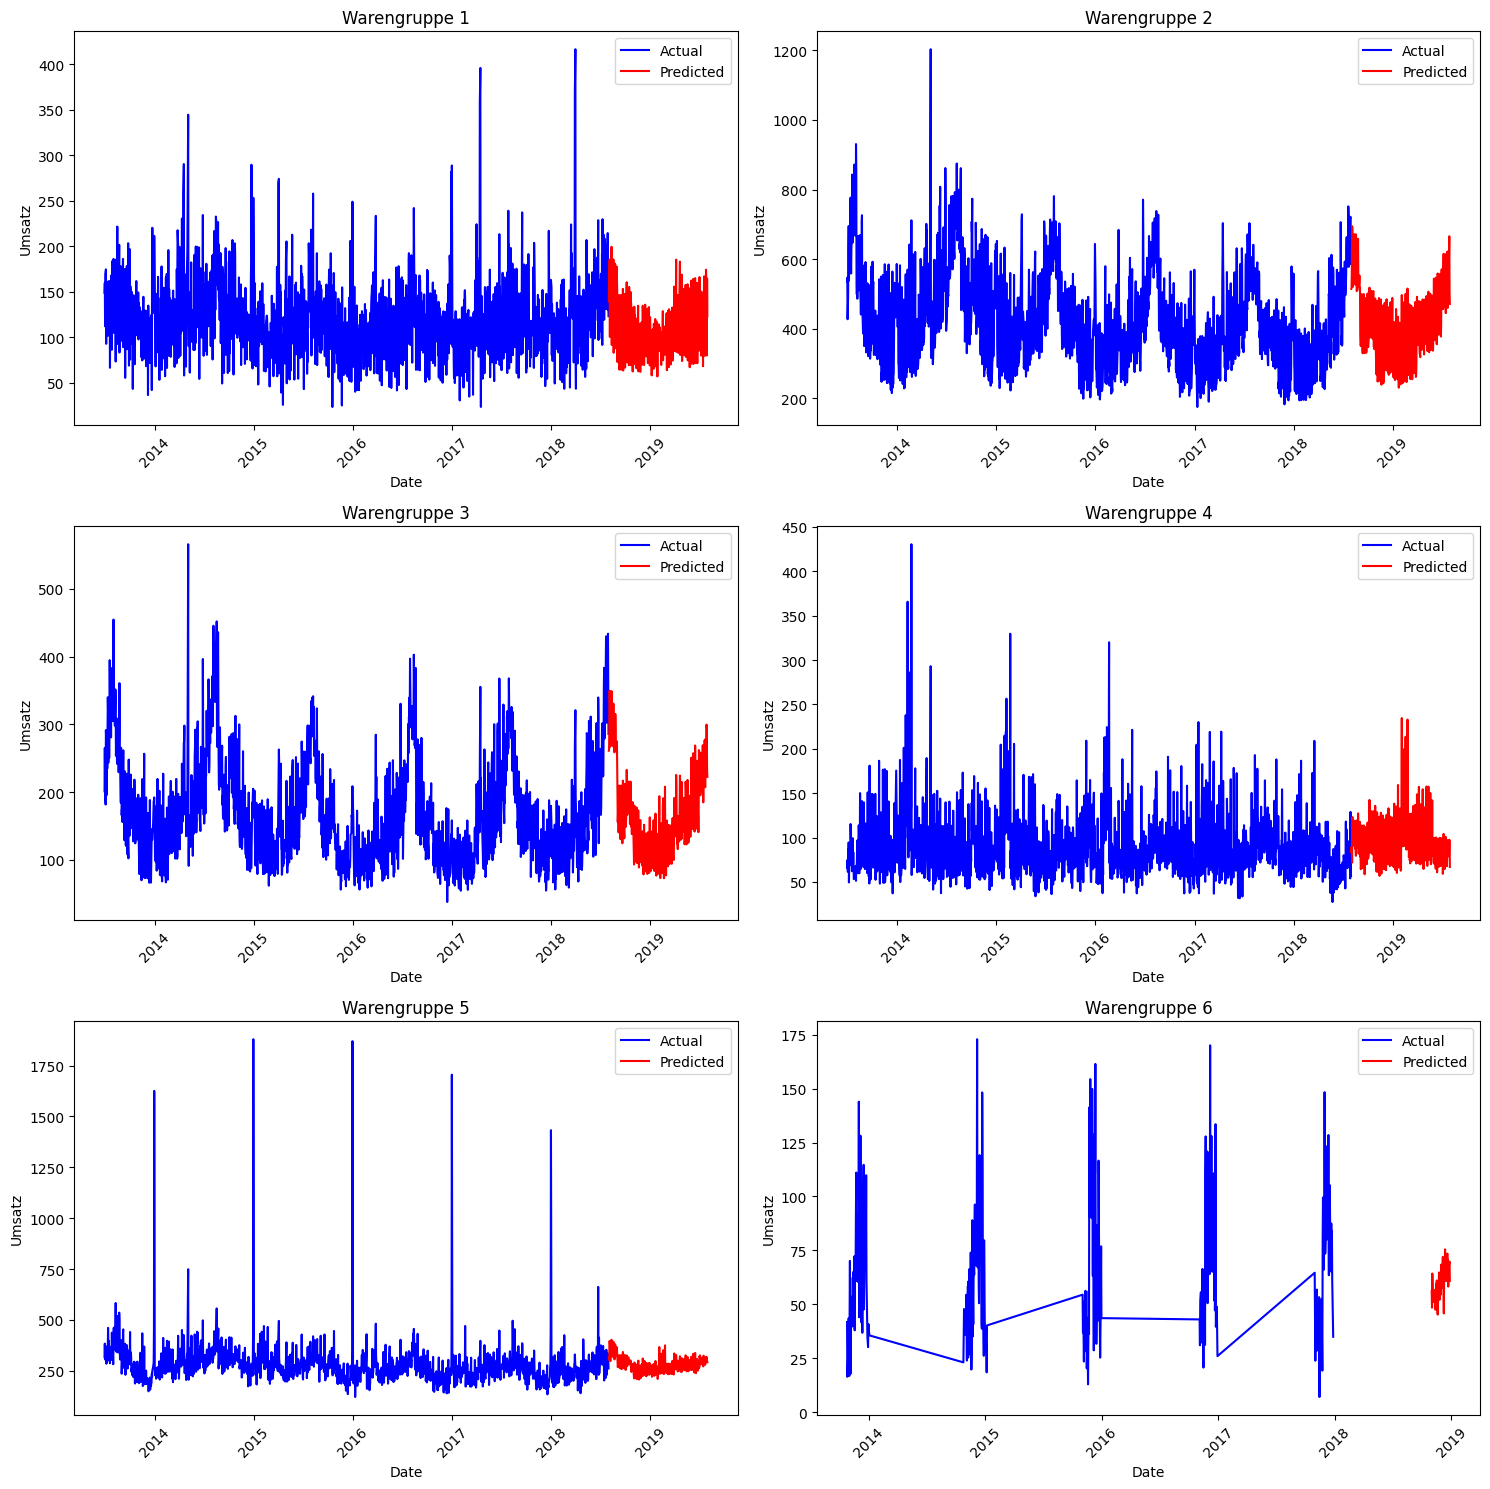

In [3]:
# visualise the actual and predicted data

import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_train is your training dataframe and predicted_test.csv has the predictions
pred_df = pd.read_csv('predicted_test.csv')

# Plot each Warengruppe separately
unique_groups = df_train['Warengruppe'].unique()

# Set up the subplot grid
n_rows = (len(unique_groups) + 1) // 2
n_cols = min(2, len(unique_groups))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()

for idx, group in enumerate(unique_groups):
    # Filter data for current group
    actual_data = df_train[df_train['Warengruppe'] == group]
    pred_data = pred_df[pred_df['Warengruppe'] == group]
    
    # Plot actual values
    axes[idx].plot(pd.to_datetime(actual_data['Datum']), actual_data['Umsatz'], 
                  label='Actual', color='blue')
    
    # Continue with predicted values
    axes[idx].plot(pd.to_datetime(pred_data['Datum']), pred_data['Predicted_Umsatz'], 
                  label='Predicted', color='red')
    
    axes[idx].set_title(f'Warengruppe {group}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Umsatz')
    axes[idx].legend()
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('umsatz_prediction_plots.png')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

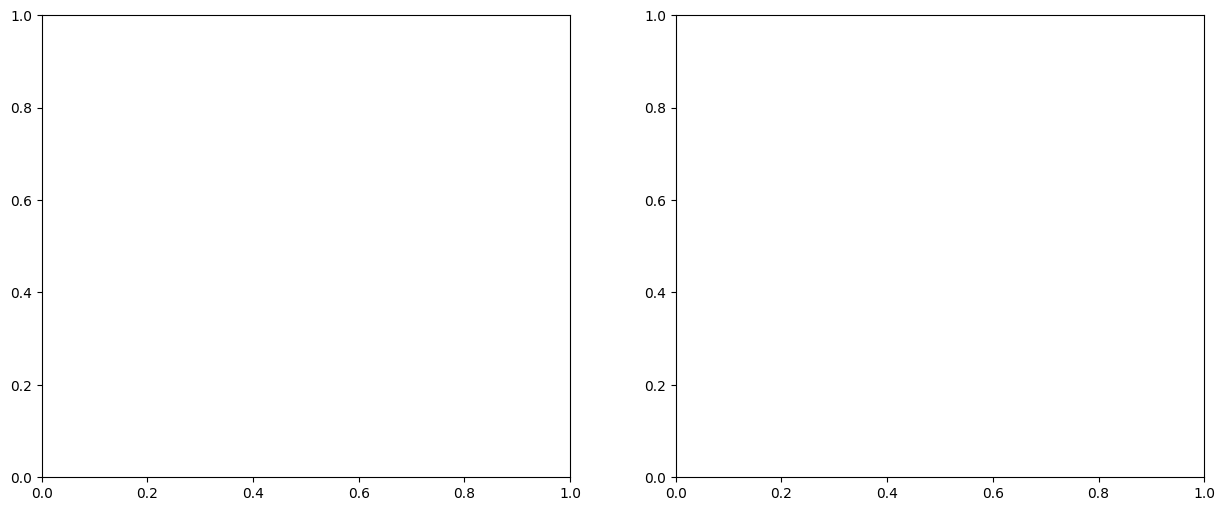

In [4]:
# this code belongs up top, takes the data from X_train to make bar charts

import matplotlib.pyplot as plt
import numpy as np

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# First plot: Weekdays
day_counts = []
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(1, 8):  # 7 days
    day_counts.append(X_train[f'Day_{i}'].sum())  # sum() counts True values

# Plot weekdays
bars1 = ax1.bar(day_names, day_counts)
ax1.set_title('Number of Occurrences by Weekday')
ax1.set_xlabel('Weekday')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Second plot: Months
month_counts = []
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(1, 13):  # 12 months
    month_counts.append(X_train[f'Month_{i}'].sum())  # sum() counts True values

# Plot months
bars2 = ax2.bar(month_names, month_counts)
ax2.set_title('Number of Occurrences by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()